In [ ]:
from defaultPlots import scatter
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import scipy 

data = pd.read_csv(r"C:\Users\deela\Downloads\BottyTrainingData.csv")
print(data)
# scatter(['Eye Radius', data['Eye Radius'].to_numpy()], ['Latitude', data['Latitude'].to_numpy()], vline = False, hline=False, z = ['MSLP', data['Pressure (mb)'].to_numpy()])

          Date/Time Storm Name Basin  Wind (kt)  Pressure (mb)  \
0      7/2/24 12:00      Beryl   ATL      145.0            934   
1      7/2/24 06:00      Beryl   ATL      145.0            935   
2      7/2/24 00:00      Beryl   ATL      135.0            938   
3      7/1/24 18:00      Beryl   ATL      130.0            946   
4      7/1/24 12:00      Beryl   ATL      115.0            959   
..              ...        ...   ...        ...            ...   
298  11/19/85 03:00       Kate   ATL      105.0            953   
299   9/25/85 00:00     Gloria   ATL      125.0            919   
300    9/1/85 15:00      Elena   ATL      110.0            953   
301   9/11/84 18:00      Diana   ATL      115.0            949   
302   8/18/83 03:00     Alicia   ATL      100.0            962   

     Eye Temperature  CDO Temperature  Symmetry  CDO Radius (v3)  Eye Radius  \
0               18.0            -69.0      0.31            131.5        13.0   
1               20.0            -74.0      0.43

In [14]:
eyeTemp = data['Eye Temperature'].to_numpy()
cdoTemp = data['CDO Temperature'].to_numpy()
cdoSymm = data['Symmetry'].to_numpy()
cdoRadi = data['CDO Radius (v3)'].to_numpy()
eyeRadi = data['Eye Radius'].to_numpy()
latitud = data['Latitude'].to_numpy()
setBack = data['Coldest Ring Radius'].to_numpy()
vmax = data['Wind (kt)'].to_numpy()
mslp = data['Pressure (mb)'].to_numpy()
name = data['Storm Name'].to_numpy()

303 (303,)
[[0.31825029]]
-65.0 25.0


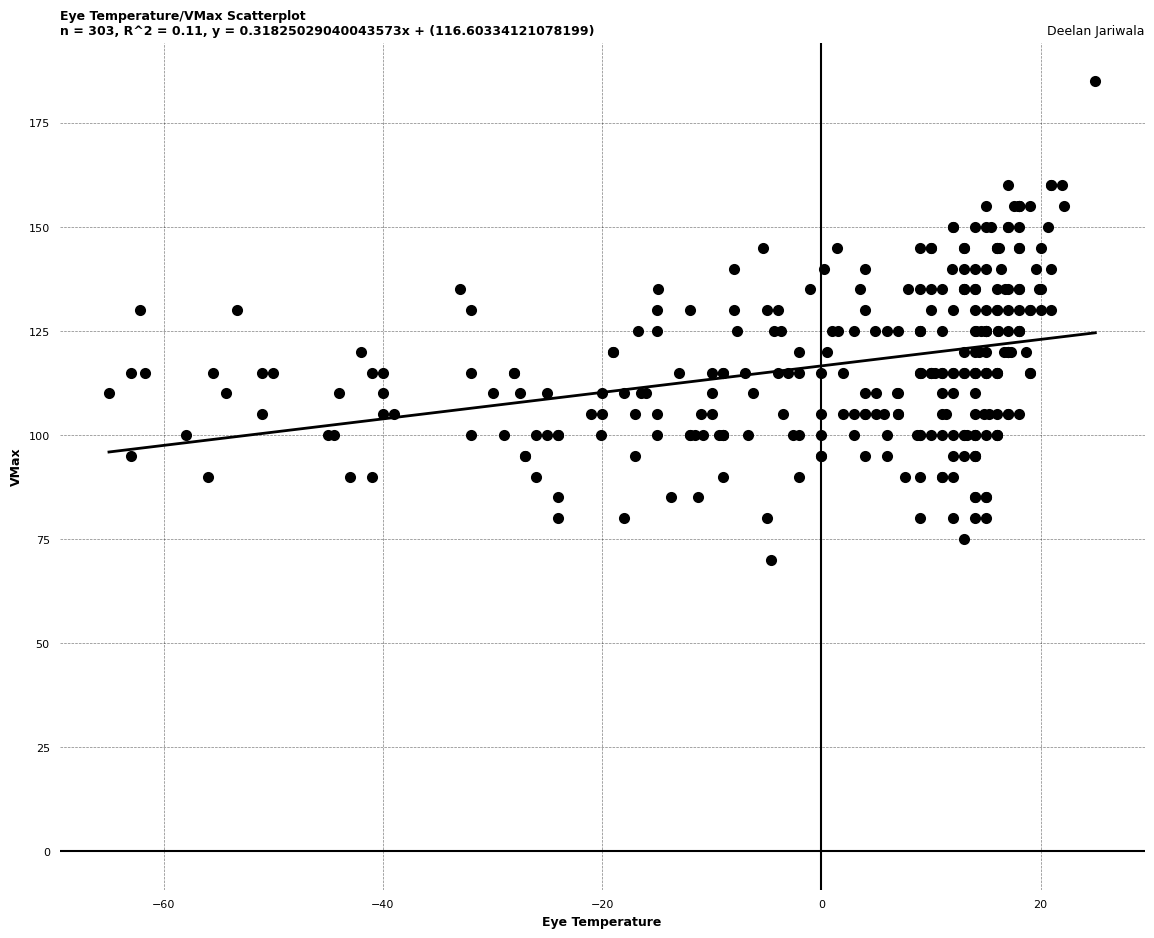

In [9]:
scatter(['Eye Temperature', eyeTemp], ['VMax', vmax])

In [3]:
def regression(input, output, RF = True): 
    if RF == True:
        regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
        regr.fit(input, output) 
        predictTest = regr.predict(input)
    else:
        regr = linear_model.LinearRegression()
        regr.fit(input, output)
        predictTest = regr.predict(input)

    try:
        importance = regr.feature_importances_
    except:
        coef = np.abs(regr.coef_ * np.nanstd(input, axis = 0))
        importance = coef / np.sum(coef)

    corr, sig = scipy.stats.pearsonr(predictTest, output)
    # error = np.sqrt(np.mean((predictTest - testOut)**2))
    error = np.mean(np.abs(predictTest - output))
    scatter(['Predicted VMax (kt)', predictTest], ['VMax (kt)', output], hline = False, vline = False)

    print(str(error) + f"mb error\nCorrelation: {corr**2}")

    return regr, predictTest, importance, input, output

303 (303,)
[[1.]]
82.29171303307679 174.548644237588


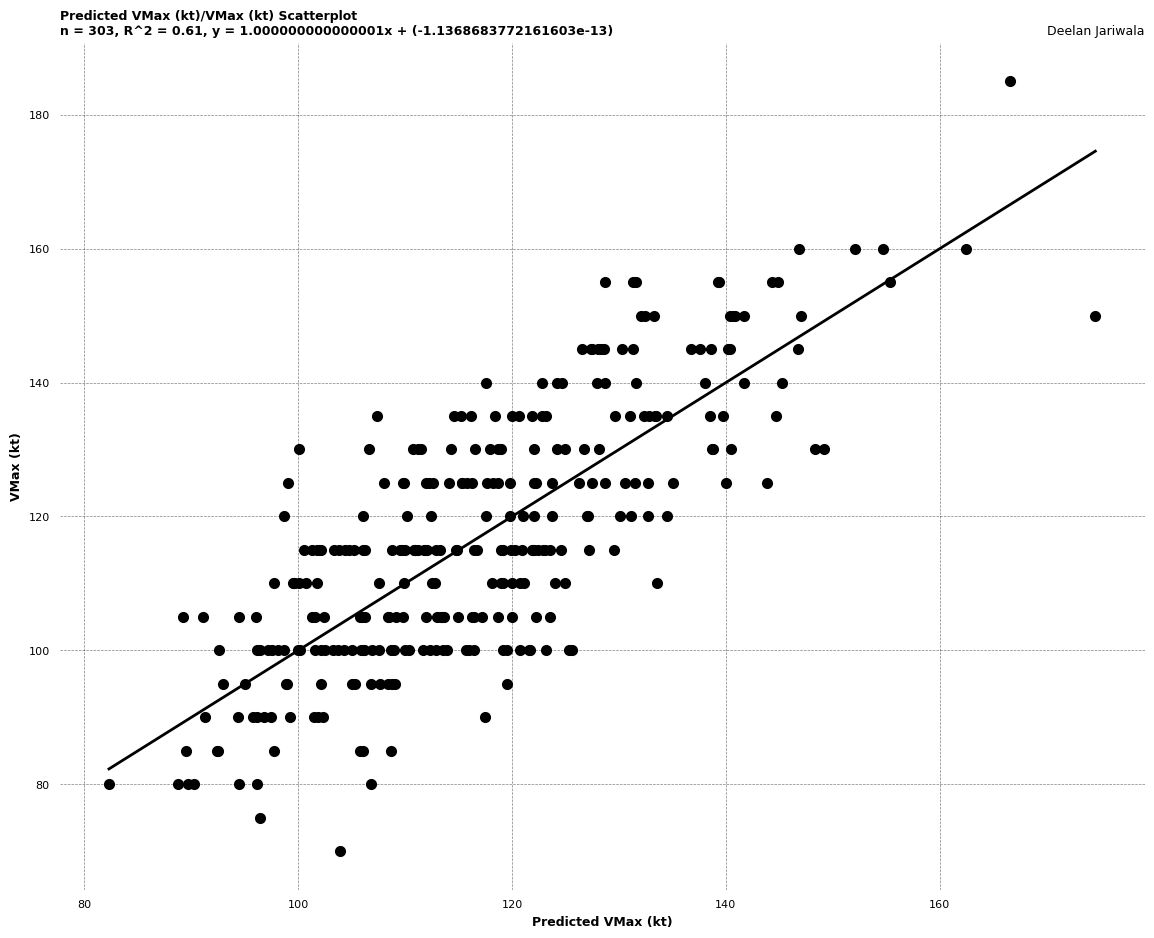

10.047848841592426mb error
Correlation: 0.6132373348382667
Feature:                     Eye Temperature, Importance: 0.20117983427888336
Feature:                          CDO Radius, Importance: 0.14489711878289435
Feature:                            Symmetry, Importance: 0.3036707860421374
Feature:                            Latitude, Importance: 0.11757984368598325
Feature:                          Eye Radius, Importance: 0.046803204844294385
Feature:                     CDO Temperature, Importance: 0.12150103472959585
Feature:                  Set Back Cold Ring, Importance: 0.0643681776362114


Beryl 145.0 128.63890611919186
Beryl 145.0 137.57804104471137
Beryl 135.0 133.37501163497217
Beryl 130.0 138.72789892836636
Beryl 115.0 129.5182128706022
Beryl 105.0 114.94369482128417
Beryl 115.0 121.86887658696332
Beryl 115.0 123.50737940789354
Beryl 100.0 125.35821749363399
Nigel 80.0 88.75864889495905
Nigel 80.0 82.29171303307679
Nigel 80.0 90.24030220538079
Nigel 85.0 92.43430210892716


In [17]:
xNames = ['Eye Temperature', 'CDO Radius', 'Symmetry', 'Latitude', 'Eye Radius', 'CDO Temperature', 'Set Back Cold Ring']
x = np.array([eyeTemp, cdoRadi, cdoSymm, latitud, eyeRadi, cdoTemp, setBack]).T
y = vmax
regr, predictTest, importance, input, output = regression(x, y, RF = False)

feat = dict(zip(xNames, importance))
# Print one key-value pair at a time
for key, value in feat.items():
    print(f"Feature: {key:>35}, Importance: {value}")
print('\n')
for x in range(len(name)):
    print(name[x], y[x], predictTest[x])